In [1]:
import numpy as np
import pandas as pd

In [2]:
credit_f=pd.read_csv("/Users/manishabrahmachary/Anales/creditcard.csv")

In [3]:
credit_f.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


** This dataset is imbalanced with the number of frauds a small portion of the dataset. So as a solution we would undersample the rest of the dataset. We take 20% of the rest of the dataset and merge with the fraud ones.**

In [12]:
credit_f1=credit_f[credit_f['Class']==0]

In [13]:
credit_f1.shape

(284315, 31)

In [23]:
credit_f1=credit_f1.sample(frac=0.2)

In [24]:
credit_f1.shape

(17059, 31)

In [25]:
credit_f2=credit_f[credit_f['Class']==1]

In [26]:
frames = [credit_f1, credit_f2]
creditfraud = pd.concat(frames)

In [27]:
creditfraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
55203,46834.0,-0.626770,0.917254,1.629186,-0.140698,1.040283,0.444661,1.087762,-0.062544,-0.428361,...,-0.158631,-0.199355,-0.606876,-0.839032,0.848598,-0.403166,-0.127971,-0.185628,4.80,0
57749,48053.0,1.103441,0.076124,0.681045,1.012438,-0.494685,-0.208828,-0.251930,0.235251,0.109171,...,-0.202702,-0.713603,0.205535,0.111448,0.088521,-0.687680,0.028716,0.018578,12.00,0
62415,50258.0,-0.075804,-0.538142,1.710947,-2.352550,-0.994628,-0.868447,0.086655,-0.398321,-2.165964,...,-0.235281,-0.253336,0.242380,0.342288,-0.859199,-0.701012,0.018594,-0.028317,60.00,0
75097,55895.0,1.013867,-2.035385,0.518342,-1.042491,-1.720422,0.671393,-1.254405,0.231963,-1.207512,...,-0.115585,-0.093392,-0.229121,-0.278148,0.384084,-0.077926,0.037064,0.037771,213.14,0
192914,129905.0,1.908011,-1.334742,-1.197587,-0.884590,-0.788066,-0.403760,-0.616996,-0.041739,-0.338781,...,0.308322,0.543164,0.074057,0.771941,-0.150172,-0.228957,-0.055571,-0.038639,141.70,0


In [35]:
creditfraud.shape


(17551, 30)

In [28]:
(creditfraud['Class']==0).sum()

17059

In [29]:
(creditfraud['Class']==1).sum()

492

In [32]:
creditfraud=creditfraud.drop('Amount', axis=1)

**Bekow the histogram can give an idea of the imbalance even after undersampling. We can probably undersample more. But I won't do it and contnue with the next steps.**

(array([ 17059.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

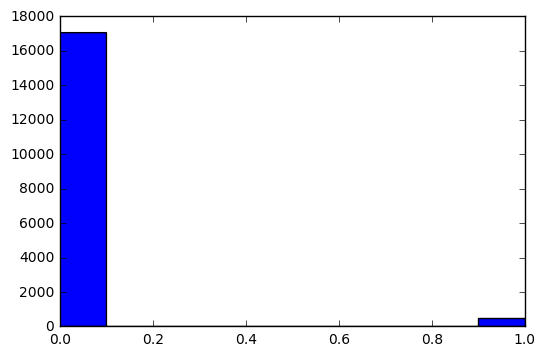

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(creditfraud['Class'])

**Now we will identify the feature columns and the target columns. We have dropped for convenience the 'Amount' column. The features are all the columns except the last one which is the target column.**

In [37]:
feature_cols=list(creditfraud.columns[:-1])
target_col=creditfraud.columns[-1]

In [38]:
X_all=creditfraud[feature_cols]
Y_all=creditfraud[target_col]

In [39]:
X_all.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
55203,46834.0,-0.626770,0.917254,1.629186,-0.140698,1.040283,0.444661,1.087762,-0.062544,-0.428361,...,0.210745,-0.038680,-0.158631,-0.199355,-0.606876,-0.839032,0.848598,-0.403166,-0.127971,-0.185628
57749,48053.0,1.103441,0.076124,0.681045,1.012438,-0.494685,-0.208828,-0.251930,0.235251,0.109171,...,-0.417953,-0.271533,-0.202702,-0.713603,0.205535,0.111448,0.088521,-0.687680,0.028716,0.018578
62415,50258.0,-0.075804,-0.538142,1.710947,-2.352550,-0.994628,-0.868447,0.086655,-0.398321,-2.165964,...,-0.796483,-0.135899,-0.235281,-0.253336,0.242380,0.342288,-0.859199,-0.701012,0.018594,-0.028317
75097,55895.0,1.013867,-2.035385,0.518342,-1.042491,-1.720422,0.671393,-1.254405,0.231963,-1.207512,...,0.279668,0.011407,-0.115585,-0.093392,-0.229121,-0.278148,0.384084,-0.077926,0.037064,0.037771
192914,129905.0,1.908011,-1.334742,-1.197587,-0.884590,-0.788066,-0.403760,-0.616996,-0.041739,-0.338781,...,0.881615,0.200681,0.308322,0.543164,0.074057,0.771941,-0.150172,-0.228957,-0.055571,-0.038639


In [40]:
Y_all.head()

55203     0
57749     0
62415     0
75097     0
192914    0
Name: Class, dtype: int64

**Now comes the model selection part. But before that we split the dataset into training and testing data with 10% of the total data being the test size.**

In [41]:
from sklearn.cross_validation import train_test_split

In [43]:
X_train,X_test, Y_train,Y_test=train_test_split(X_all,Y_all, test_size=.1, stratify=Y_all, random_state=130)

** Now we will do two things. We will use logistic regression as a model to train on the training sets and then calculate the F1 scores on the training as well as testing set. Next we would use to kinds of cross validation methods to improve on what we have and also calculate the auc_roc score in addition to F1 score.**

In [45]:
from sklearn import linear_model
from sklearn import svm

clf=linear_model.LogisticRegression(penalty='l2',random_state=130)

In [46]:
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=130, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
from sklearn.metrics import f1_score
def predict_labels_f1(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    y_pred = clf.predict(features)
        
    # Print and return results
    return f1_score(target.values, y_pred)


In [54]:
predict_labels_f1(clf,X_train,Y_train)

0.77435897435897427

In [55]:
predict_labels_f1(clf, X_test, Y_test)

0.8314606741573034

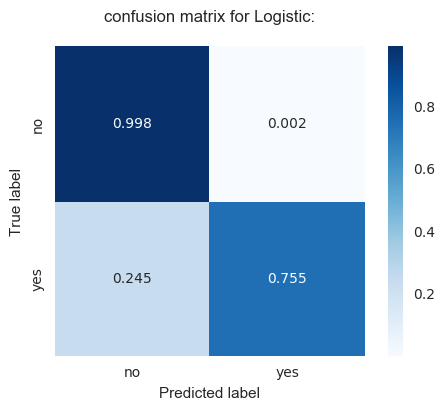

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

model= clf
cm = confusion_matrix(Y_test,model.predict(X_test))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, annot=True,fmt='.3f', cmap='Blues', xticklabels = ['no','yes'], yticklabels = ['no','yes'],square=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('confusion matrix for Logistic:\n')

In [84]:
    from sklearn.cross_validation import KFold
    from sklearn.grid_search import GridSearchCV
    from sklearn.linear_model import LogisticRegressionCV
    from sklearn.metrics import f1_score, make_scorer
    
    f1_scorer = make_scorer(f1_score,greater_is_better=True)
    

**In the steps below we use the first method for cross validation and look at the auc_roc and F1 scores. Next we will use gridsearch cross validation method to calculate F1 scores. It would be obvious which works better. One thing interesting to note is that in each case the testing score is higher than the training score for F1 scoring.**

In [83]:

from sklearn.metrics import roc_auc_score
#fold = KFold(len(Y_all), n_folds=5, shuffle=True, random_state=777)
searchCV = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring=f1_scorer
        ,cv=10
        ,random_state=777
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=10
    )
searchCV.fit(X_train, Y_train)
y_pred_train = searchCV.predict(X_train)
y_pred_test = searchCV.predict(X_test)

print ('Max auc_roc:', searchCV.scores_[1].max())
print("Tunes model auc_roc for training {:.4f}".format(roc_auc_score(Y_train, y_pred_train, average='macro'))
print("Tunes model auc_roc for testing {:.4f}".format(roc_auc_score(Y_test, y_pred_test, average='macro')))
print( "Tuned model has a training F1 score of {:.4f}.".format(predict_labels_f1(searchCV, X_train, Y_train)))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels_f1(searchCV, X_test, Y_test)))


/Users/manishabrahmachary/anaconda/lib/python3.5/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/manishabrahmachary/anaconda/lib/python3.5/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/manishabrahmachary/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Max auc_roc: 0.928571428571
Tunes model auc_roc for training 0.9105
Tunes model auc_roc for testing 0.9181
Tuned model has a training F1 score of 0.8922.
Tuned model has a testing F1 score of 0.9011.


In [85]:
from sklearn.grid_search import GridSearchCV
C_range = np.logspace(-2, 10, 13)
parameter = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

# TODO: Initialize the classifier
clf = linear_model.LogisticRegression(penalty='l2',random_state=50)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,greater_is_better=True)
# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameter, scoring = f1_scorer, cv=None)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,Y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print( "Tuned model has a training F1 score of {:.4f}.".format(predict_labels_f1(clf, X_train, Y_train)))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels_f1(clf, X_test, Y_test)))

Tuned model has a training F1 score of 0.7744.
Tuned model has a testing F1 score of 0.8315.
